# Scatter plots from a Dataframe

#### References:

 - [seaborn.scatterplot (documentation)](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
 - [seaborn.joinplot (documentation)](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
 - [seaborn.lmplot (documentation)](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### tips dataset

In [2]:
df = sns.load_dataset('tips')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [3]:
# data selection
colname_x = 'tip'
colname_y = 'total_bill'
colname_cat1 = 'sex'
colname_cat2 = 'smoker'
colname_cat3 = 'day'
colname_num1 = 'size'

## scatterplot

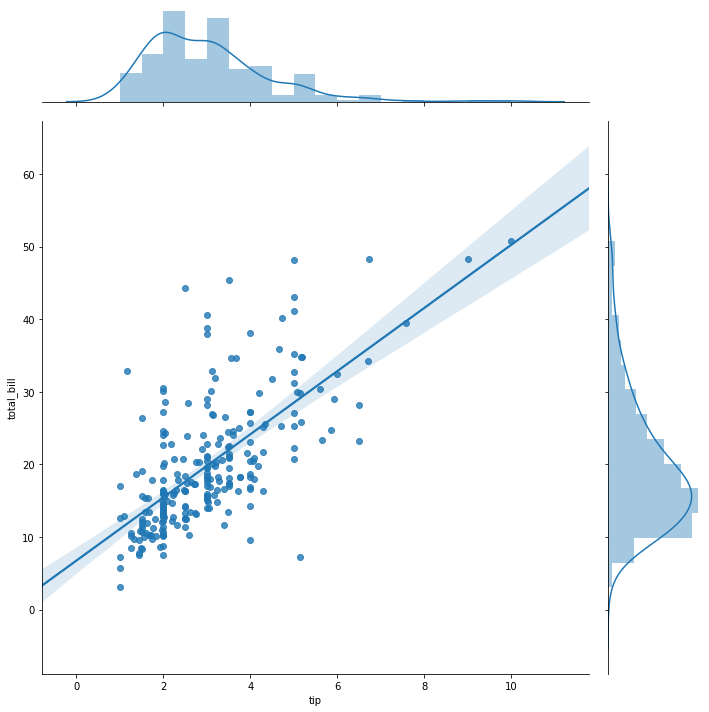

In [5]:
## scatter plot including the possibility of a basic linear regression
def scatter(df:'dataframe', colname_x:str, colname_y:str, kind:str = 'scatter', lowess:bool = False, robust:bool = False, size:int = 10, title:str = '', grid:bool = True, colname_color:str = '', colname_style:str = '', colname_size:str = ''):
    """
    Scatter plot including the possibility of a basic linear regression.
    df -- dataframe.
    colname_x -- column name of x values to be plotted.
    colname_y -- column name of y values to be plotted.
    kind -- type of chart to be plotted (default 'scatter'): 
        - "scatter": basic scatter plot.
        - "reg": including a basic linear regression estimation.
        - "hex": scatter plot where points being groupped in hexagons.
        - "kde": kde estimations for points and histogramns.
    lowess -- if True, use statsmodels to estimate a nonparametric lowess model (locally weighted linear regression) (default False). 
    robust -- if True, use statsmodels to estimate a robust regression. This will de-weight outliers (default False)
    size -- size of square chart (default 10).
    title -- general title (default '').
    gird -- draw vertical and horizontal grid lines (default False).
    colname_color -- column name of categorical/numerical variable to split data by color (default '').
    colname_style -- column name of categorical variable to split data by marker (default '').
    colname_size -- column name of categorical/numerical variable to split data by maker size (default '').
    """
    # arguments validation
    colnames = df.columns.tolist()
    assert colname_x in colnames and colname_y in colnames, "columns x/y not available."
    if colname_color != '': assert colname_color in colnames, "column '%s' is not available."%colname_color
    if colname_style != '': assert colname_style in colnames, "column '%s' is not available."%colname_style
    if colname_size != '': assert colname_size in colnames, "column '%s' is not available."%colname_size
    # create figure
    if (colname_color != '' or colname_style != '' or colname_size != '') and kind != 'reg': fig = plt.figure(figsize = (size,size))
    # displaying cases
    if colname_color != '' and colname_style == '' and colname_size == '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_color, data=df, legend="full", height = size)
            ax = g.fig.gca()
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, hue = colname_color, data=df, legend="full")
    elif colname_color == '' and colname_style != '' and colname_size == '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_style, data=df, legend="full", height = size)
            ax = g.fig.gca()
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, style = colname_style, data=df, legend="full")
    elif colname_color == '' and colname_style == '' and colname_size != '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_size, data=df, legend="full", height = size)
            ax = g.fig.gca()
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, style = colname_size, data=df, legend="full")
    elif colname_color != '' and colname_style != '' and colname_size == '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_color, col = colname_style, data=df, legend="full", height = size)
            ax = g.fig.gca()
            grid = False
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, hue = colname_color, style = colname_style, data=df, legend="full")
    elif colname_color != '' and colname_style == '' and colname_size != '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_color, col = colname_size, data=df, legend="full", height = size)
            ax = g.fig.gca()
            grid = False
        else: 
            ax = sns.scatterplot(x=colname_x, y=colname_y, hue = colname_color, size = colname_size, data=df, legend="full")
    elif colname_color == '' and colname_style != '' and colname_size != '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_style, col = colname_size, data=df, legend="full", height = size)
            ax = g.fig.gca()
            grid = False
        else:
            ax = sns.scatterplot(x=colname_x, y=colname_y, style = colname_style, size = colname_size, data=df, legend="full")
    elif colname_style != '' and colname_color != '' and colname_size != '': 
        if kind == 'reg': 
            g = sns.lmplot(x=colname_x, y=colname_y, hue = colname_color, col = colname_style, row = colname_size, data=df, legend="full", height = size)
            ax = g.fig.gca()
            grid = False
        else:
            ax = sns.scatterplot(x=colname_x, y=colname_y, hue = colname_color, style = colname_style, size = colname_size, data=df, legend="full")
    else:
        if kind == 'reg' and lowess:
            g = sns.lmplot(x=colname_x, y=colname_y, data=df, legend="full", height = size, lowess = True)
        elif kind == 'reg' and robust:
            g = sns.lmplot(x=colname_x, y=colname_y, data=df, legend="full", height = size, robust = True)
        else:
            g = sns.jointplot(x=colname_x, y=colname_y, data=df, height = size, kind = kind)
        ax = g.fig.gca()
        grid = False
    # title
    if title != '': ax.set_title(title, fontsize = 12)
    # plot grid axis
    if grid: ax.xaxis.grid(True)
    if grid: ax.yaxis.grid(True)
    # display
    plt.show()
    
scatter(df, colname_x, colname_y, kind = 'reg')